In [1]:
# I have done two different PCAs: the first found only **one dimension accounted for .999 of variability**.
# Therefore, I did a second specifying 4 dimensions and use t-SNE on that, which reduced it to two and allowed
# me something to visualize.

# Given the analysis below, I would advise against creating a cryptocurrency investment portfolio. The truth 
# is that only one dimension accounts for nearly all variability. K-means testing showed that 3 clusters would 
# be appropriate. However, with only one component, visualization was not possible. Even using more dimensions 
# and t-SNE does not show any clear clusters. This market needs to mature more and allow for differentiation.

In [2]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

crypto_df = pd.read_csv ('crypto_data.csv')

print(crypto_df)

     trd_code        CoinName Algorithm  IsTrading ProofType  TotalCoinsMined  \
0          42         42 Coin    Scrypt       True   PoW/PoS     4.199995e+01   
1         365         365Coin       X11       True   PoW/PoS              NaN   
2         404         404Coin    Scrypt       True   PoW/PoS     1.055185e+09   
3         611       SixEleven   SHA-256       True       PoW              NaN   
4         808             808   SHA-256       True   PoW/PoS     0.000000e+00   
...       ...             ...       ...        ...       ...              ...   
1247      XBC     BitcoinPlus    Scrypt       True       PoS     1.283270e+05   
1248     DVTC      DivotyCoin    Scrypt      False   PoW/PoS     2.149121e+07   
1249     GIOT     Giotto Coin    Scrypt      False   PoW/PoS              NaN   
1250     OPSC  OpenSourceCoin   SHA-256      False   PoW/PoS              NaN   
1251     PUNK       SteamPunk       PoS      False       PoS              NaN   

     TotalCoinSupply  
0   

In [3]:
#Data prep

crypto_df = crypto_df.dropna()
crypto_df = crypto_df.astype({'TotalCoinsMined': 'int', 'TotalCoinSupply': 'float64'})

crypto_df = crypto_df.loc[(crypto_df['IsTrading'] == True) & (crypto_df['TotalCoinsMined'] > 0)]

#added title to and deleted first column (which isn't mentioned in the homework) as well as coin name
crypto_df = crypto_df.drop(['CoinName', 'trd_code'], axis = 1) 

crypto_dfd = pd.get_dummies(crypto_df)

scaler = StandardScaler().fit(crypto_dfd)


print(crypto_dfd)

      IsTrading  TotalCoinsMined  TotalCoinSupply  \
0          True               41     4.200000e+01   
2          True       1055184902     5.320000e+08   
7          True         17927175     2.100000e+07   
8          True        107684222     0.000000e+00   
9          True         63039243     8.400000e+07   
...         ...              ...              ...   
1238       True       1999999995     2.000000e+09   
1242       True         14931046     2.500000e+08   
1245       True        980222595     1.400223e+09   
1246       True          7296537     2.100000e+07   
1247       True           128326     1.000000e+06   

      Algorithm_1GB AES Pattern Search  Algorithm_Argon2d  Algorithm_BLAKE256  \
0                                    0                  0                   0   
2                                    0                  0                   0   
7                                    0                  0                   0   
8                                    0 

In [4]:
# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(n_components=0.90)


# Get three principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_dfd)


print(crypto_pca)

[[-2.19932863e+09]
 [-1.66693203e+09]
 [-2.17832193e+09]
 [-2.19928819e+09]
 [-2.11530498e+09]
 [-2.17732528e+09]
 [-2.19932220e+09]
 [-1.98928607e+09]
 [-2.17832590e+09]
 [-2.17732819e+09]
 [-2.18682416e+09]
 [-2.17832650e+09]
 [-1.84931909e+09]
 [-2.17932448e+09]
 [-2.13532409e+09]
 [-2.18255327e+09]
 [-2.19908979e+09]
 [-1.98694137e+08]
 [ 3.81800644e+11]
 [-2.02946911e+09]
 [-1.94928021e+09]
 [-2.09932591e+09]
 [-2.19928241e+09]
 [-1.95223111e+09]
 [-2.11531005e+09]
 [-2.15115010e+09]
 [-2.19882865e+09]
 [-2.17832596e+09]
 [-2.19832828e+09]
 [-2.18618690e+09]
 [-2.18132679e+09]
 [-2.19494743e+09]
 [-2.17832081e+09]
 [-1.89945395e+09]
 [-2.16732134e+09]
 [-2.19932653e+09]
 [-2.19915505e+09]
 [-2.18809243e+09]
 [-1.86325025e+09]
 [-7.78386782e+08]
 [-2.12930399e+09]
 [-2.12706731e+09]
 [-2.07929512e+09]
 [-2.19869765e+09]
 [-2.17732204e+09]
 [-2.17832074e+09]
 [-1.93385095e+09]
 [-2.17932141e+09]
 [-2.19797826e+09]
 [-2.09930558e+09]
 [-2.15731433e+09]
 [-1.99931348e+09]
 [-2.1893264

In [5]:
# explained variance
# no t-sne possible with one dimension. further down, I use more for the sake of meeting the requirements.

pca.explained_variance_ratio_

array([0.99968229])

In [6]:
crypto_pca_df = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1"]
)
crypto_pca_df.head()

,principal component 1
0,-2.199329e+09
1,-1.666932e+09
2,-2.178322e+09
3,-2.199288e+09
4,-2.115305e+09


C:\Users\Lunaclara\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


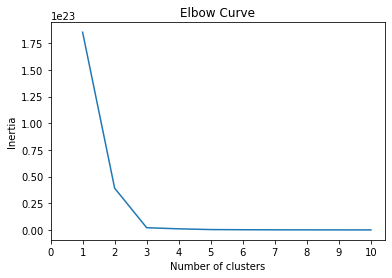

In [7]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(crypto_pca_df)

# Predict clusters
predictions = model.predict(crypto_pca_df)

# Add the predicted class column to the dataframe
crypto_pca_df['class'] = model.labels_


crypto_pca_df.head()

,principal component 1,class
0,-2.199329e+09,0
1,-1.666932e+09,0
2,-2.178322e+09,0
3,-2.199288e+09,0
4,-2.115305e+09,0


In [9]:
# This is using more dimensions than PCA really called for so that I could do t-sne I previously got docked for not
# doing t-sne

# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(n_components=4)


# Get four principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_dfd)


print(crypto_pca)

[[-2.19932863e+09 -1.52528801e+08  8.14423334e-01 -6.78567047e-01]
 [-1.66693203e+09  9.02455988e+08  8.27443524e-01 -7.24128388e-01]
 [-2.17832193e+09 -1.34609563e+08 -7.24464917e-01  1.97004695e-01]
 ...
 [-7.98737658e+08  8.27167290e+08 -7.30430569e-01  6.00381705e-02]
 [-2.17832593e+09 -1.45240200e+08 -7.19184256e-01  1.05898149e-01]
 [-2.19832862e+09 -1.52400892e+08  2.12621799e-01 -1.52687126e-01]]


In [10]:
crypto_pca_df2 = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1","principal component 2", "principal component 3", 
                             "principal component 4"]
)
crypto_pca_df2.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,-2.199329e+09,-1.525288e+08,0.814423,-0.678567
1,-1.666932e+09,9.024560e+08,0.827444,-0.724128
2,-2.178322e+09,-1.346096e+08,-0.724465,0.197005
3,-2.199288e+09,-4.484463e+07,-0.717919,0.098412
4,-2.115305e+09,-8.952118e+07,-0.574682,-0.743414


In [11]:
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [12]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca_df2)

In [13]:
# The dataset has 2 columns
tsne_features.shape

(477, 2)

In [14]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_pca_df2['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df2['y'] = tsne_features[:,1]

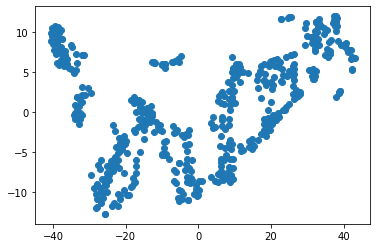

In [15]:
# Visualize the clusters
plt.scatter(crypto_pca_df2['x'], crypto_pca_df2['y'])
plt.show()